In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm # to build a LOWESS model
lowess = sm.nonparametric.lowess
import math
import sys
import os

import numpy as np
import matplotlib.dates as mdates
from matplotlib import gridspec
import matplotlib as mpl
import matplotlib
import matplotlib.font_manager as fm
#---------------MATPLOTLIB USER OPTIONS---------
tick_fontsize = 10
label_fontsize = 12
title_fontsize = 16
mpl.rcParams['font.family'] = 'Roboto'
plt.rcParams['axes.linewidth'] = 1.0
plt.rc('xtick', labelsize=tick_fontsize)
plt.rc('ytick', labelsize=tick_fontsize)
plt.rc('axes', labelsize=label_fontsize)
plt.rc('axes', titlesize=title_fontsize)
plt.rc('legend', fontsize=label_fontsize)    # legend fontsize
plt.rc('figure', titlesize=title_fontsize)  # fontsize of the figure title
plt.rcParams['axes.facecolor'] = 'None'

width = 6.88 
height = width/1.618 

In [197]:
mankoff_mtg = pd.read_csv('C:/Users/s1834371/Documents/mankoff_mtg_gates.csv')

In [198]:
def load_discharge_data(gate, skip):
    discharge_data = pd.read_csv(data_dir + 'discharge/%s_gate_ice_discharge_v3.csv' % gate, index_col=1)
    discharge_data.index = pd.DatetimeIndex(discharge_data.index, dayfirst=True) # convert to datetime object
    # print(discharge_data.index)

    discharge_data = discharge_data.drop(discharge_data.columns[0],axis=1) # dropping first index column

    u_err = discharge_data['u_error'].resample('D').interpolate() # resampling to daily resolution (upper error)
    l_err = discharge_data['l_error'].resample('D').interpolate() # lower error

    discharge_data = discharge_data.drop(discharge_data.columns[1],axis=1)
    discharge_data = discharge_data.drop(discharge_data.columns[1],axis=1)

    discharge_data_resamp = discharge_data.resample('D').interpolate() # resample to daily resolution
    #discharge_data_resamp.to_csv('%s_discharge_daily.csv' % gate)

    return discharge_data_resamp, u_err, l_err

### Load in discharge data ############
data_dir = 'C:/Users/s1834371/Documents/GrIS_late-season-melt-event/data/'

skip = 0 
discharge_KNS, uerr_KNS, lerr_KNS = load_discharge_data('KNS', skip)
discharge_AS, uerr_AS, lerr_AS = load_discharge_data('AS', skip)

# SUM UP all gates in sector
sum_sector_discharge = discharge_KNS + discharge_AS
#print(sum_sector_discharge)
#sys.exit()
#sum_sector_discharge.to_csv('summed_discharge.csv')

sum_u_error = uerr_KNS.copy() # copy pd dataframe strucutre
sum_l_error = lerr_KNS.copy() # copy pd dataframe strucutre
for t in range(len(uerr_KNS.index)):
    sum_u_error[t] = math.sqrt(uerr_KNS[t]**2+ uerr_AS[t]**2 )
    sum_l_error[t] = math.sqrt(lerr_KNS[t]**2 + lerr_AS[t]**2 )

C:\Users\s1834371\AppData\Local\Temp\ipykernel_15252\3924408868.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum_u_error[t] = math.sqrt(uerr_KNS[t]**2+ uerr_AS[t]**2 )
C:\Users\s1834371\AppData\Local\Temp\ipykernel_15252\3924408868.py:35: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  sum_u_error[t] = math.sqrt(uerr_KNS[t]**2+ uerr_AS[t]**2 )
C:\Users\s1834371\AppData\Local\Temp\ipykernel_15252\3924408868.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a val

In [199]:

mankoff_mtg.index = pd.DatetimeIndex(mankoff_mtg['Date'], dayfirst=True)
time_mask_mankoff = (mankoff_mtg.index > '2022-05-01') & (mankoff_mtg.index <= '2023-04-30')
mankoff_mtg = mankoff_mtg.loc[time_mask_mankoff]

discharge22 = sum_sector_discharge[(sum_sector_discharge.index > '2022-05-01') & (sum_sector_discharge.index <= '2023-04-30')]
sum_u_error_22 = sum_u_error[(sum_u_error.index > '2022-05-01') & (sum_u_error.index <= '2023-04-30')]
sum_l_error_22 = sum_l_error[(sum_l_error.index > '2022-05-01') & (sum_l_error.index <= '2023-04-30')]


# Ing_Gates_KNS = Ing_Gates_KNS.resample('M').mean()
#Ing_Gates_AS = Ing_Gates_AS.resample('M').mean()
#Ing_Gates_KNS = Ing_Gates_KNS.resample('M').mean()

# Ing_Gates_KNS['u_error'] = Ing_Gates_KNS['u_error'].resample('M').sum()
# Ing_Gates_KNS['l_error'] = Ing_Gates_KNS['l_error'].resample('M').sum()

# Ing_Gates_AS['discharge'] = Ing_Gates_AS['discharge'].resample('M').sum()


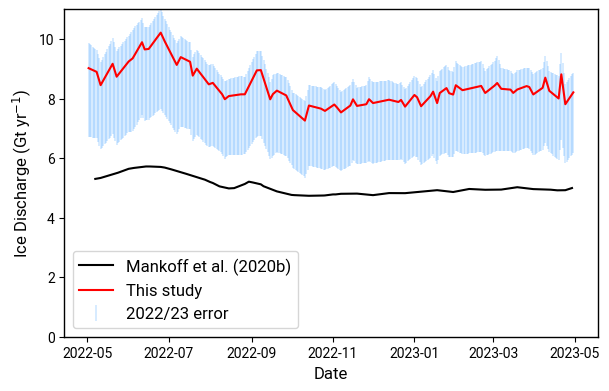

In [204]:
plt.figure(figsize=(width,height))
sum_mankoff_discharge = mankoff_mtg['275'] + mankoff_mtg['270']

plt.plot(mankoff_mtg.index, sum_mankoff_discharge,color='k',label='Mankoff et al. (2020b)')
#plt.plot(mankoff_mtg.index,mankoff_mtg['270'],color='k',label='Mankoff et al. (2016)')


comb_error = [sum_l_error_22.values, sum_u_error_22.values]

plt.errorbar(discharge22.index, discharge22['discharge'], yerr=comb_error, zorder=1, ls='none', elinewidth=1.26, ecolor='dodgerblue', alpha=0.2, label='2022/23 error')
plt.plot(discharge22.index, discharge22['discharge'] ,color='r',label='This study')

plt.ylim(0, 11)

#plt.plot(Ing_Gates_AS.index,Ing_Gates_AS['discharge'],color='b',label='AS')
plt.legend()
plt.ylabel('Ice Discharge (Gt yr$^{-1}$)')
plt.xlabel('Date')
plt.show()